# Household electricity consumption data analysis and forecasting task

1. Energy Management: Forecasting household power consumption enables energy management companies and utilities to predict and manage power demand. This can help them to make better decisions on how much power to generate, store, and distribute, leading to more efficient use of energy resources.

3. Cost Reduction: By accurately predicting household power demand, energy providers can reduce costs associated with power generation and distribution. This can help reduce the overall cost of energy for consumers.


2. Renewable Energy Integration: As renewable energy sources like solar and wind become more prevalent, it becomes important to predict when households will require energy from the grid, and when they will produce excess energy. Accurate forecasting can help utilities integrate renewable energy sources more effectively and reduce the need for backup power.

3. Grid Stability: Accurate forecasting helps utilities maintain grid stability by ensuring that there is enough power supply to meet the demand. This is particularly important during peak periods when demand is high and the grid is under stress.







In [4]:
#importing necessary python packages to deal with the dataset
import numpy as np
import pandas as pd
import math
import time
import os
import warnings
warnings.filterwarnings('ignore')

#load the dataset
df=pd.read_csv(r"...\household_power_consumption.txt",delimiter=';')
df.head()



,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df.shape

(2075259, 9)

In [6]:
df.size

18677331

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [8]:
df_reduced=df.copy()
df_reduced=df_reduced[:12000]
df_reduced.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   12000 non-null  object 
 1   Time                   12000 non-null  object 
 2   Global_active_power    12000 non-null  object 
 3   Global_reactive_power  12000 non-null  object 
 4   Voltage                12000 non-null  object 
 5   Global_intensity       12000 non-null  object 
 6   Sub_metering_1         12000 non-null  object 
 7   Sub_metering_2         12000 non-null  object 
 8   Sub_metering_3         11998 non-null  float64
dtypes: float64(1), object(8)
memory usage: 843.9+ KB


In [10]:
# Convert features for better analysis for the reduced dataset
df_reduced['date_time']=pd.to_datetime(df_reduced['Date']+' '+df_reduced['Time'])
df_reduced['Global_active_power']=pd.to_numeric(df_reduced['Global_active_power'],errors='coerce')
df_reduced['Voltage']=pd.to_numeric(df_reduced['Voltage'],errors='coerce')

#cleaning all NaN values to be dropped
df_reduced=df_reduced.dropna(subset=['Global_active_power'])
df_reduced=df_reduced.dropna(subset=['Voltage'])

df_reduced['date_time']=pd.to_datetime(df_reduced['date_time'])
df_reduced=df_reduced.loc[:,['date_time','Global_active_power','Voltage']]
df_reduced.sort_values('date_time',inplace=True,ascending=True)
df_reduced=df_reduced.reset_index(drop=True)


In [11]:
df_reduced.head()

,date_time,Global_active_power,Voltage
0,2006-12-16 17:24:00,4.216,234.84
1,2006-12-16 17:25:00,5.360,233.63
2,2006-12-16 17:26:00,5.374,233.29
3,2006-12-16 17:27:00,5.388,233.74
4,2006-12-16 17:28:00,3.666,235.68


In [12]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11998 entries, 0 to 11997
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            11998 non-null  datetime64[ns]
 1   Global_active_power  11998 non-null  float64       
 2   Voltage              11998 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 281.3 KB


In [13]:
df_reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,11998.0,1.848938,1.426543,0.194,0.452,1.564,2.7215,8.698
Voltage,11998.0,241.066159,3.651580,228.910,238.440,241.500,243.8700,249.480


In [14]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [15]:
df_reduced.isnull().sum()

date_time              0
Global_active_power    0
Voltage                0
dtype: int64

<AxesSubplot:xlabel='Sub_metering_3', ylabel='Density'>

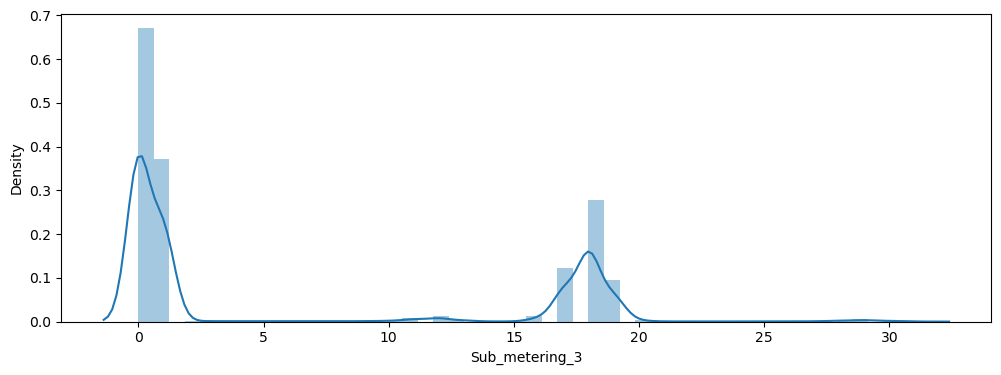

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(12,4))
sns.distplot(df.Sub_metering_3)

In [17]:
df.Sub_metering_3.fillna(df.Sub_metering_3.mean())

0          17.0
1          16.0
2          17.0
3          17.0
4          17.0
           ... 
2075254     0.0
2075255     0.0
2075256     0.0
2075257     0.0
2075258     0.0
Name: Sub_metering_3, Length: 2075259, dtype: float64

In [18]:
df.Sub_metering_3.isnull().sum()

25979

In [19]:
df['Sub_metering_3']=df['Sub_metering_3'].fillna(df['Sub_metering_3']).mean()

In [20]:
df.Sub_metering_3.isnull().sum()

0

In [21]:
#continuing to analysis our reduced dataset by splitting time into coloumns features
df_reduced['year']=df_reduced['date_time'].apply(lambda x:x.year)
df_reduced['quarter']=df_reduced['date_time'].apply(lambda  x:x.quarter)
df_reduced['month']=df_reduced['date_time'].apply(lambda x:x.month)
df_reduced['day']=df_reduced['date_time'].apply(lambda x:x.day)

#displaying all newly-created coloumn features
df_reduced=df_reduced.loc[:,['date_time','Global_active_power','year','quarter','month','day']]
df_reduced.sort_values('date_time',inplace=True,ascending=True)
df_reduced=df_reduced.reset_index(drop=True)
df_reduced['weekday']=df_reduced.apply(lambda row : row['date_time'].weekday(),axis=1)
df_reduced["weekday"]=(df_reduced['weekday']<5).astype(int)

#printing the data analysis outcome
print('Number of rows and columns after removing missing values:',df_reduced.shape)
print('The time series starts from:',df_reduced['date_time'].min())
print('The time series ends on:',df_reduced['date_time'].max())


Number of rows and columns after removing missing values: (11998, 7)
The time series starts from: 2006-12-16 17:24:00
The time series ends on: 2006-12-25 01:23:00


In [22]:
df_reduced.head(10)

,date_time,Global_active_power,year,quarter,month,day,weekday
0,2006-12-16 17:24:00,4.216,2006,4,12,16,0
1,2006-12-16 17:25:00,5.360,2006,4,12,16,0
2,2006-12-16 17:26:00,5.374,2006,4,12,16,0
3,2006-12-16 17:27:00,5.388,2006,4,12,16,0
4,2006-12-16 17:28:00,3.666,2006,4,12,16,0
5,2006-12-16 17:29:00,3.520,2006,4,12,16,0
6,2006-12-16 17:30:00,3.702,2006,4,12,16,0
7,2006-12-16 17:31:00,3.700,2006,4,12,16,0
8,2006-12-16 17:32:00,3.668,2006,4,12,16,0
9,2006-12-16 17:33:00,3.662,2006,4,12,16,0


In [23]:
df_reduced.head(140)

,date_time,Global_active_power,year,quarter,month,day,weekday
0,2006-12-16 17:24:00,4.216,2006,4,12,16,0
1,2006-12-16 17:25:00,5.360,2006,4,12,16,0
2,2006-12-16 17:26:00,5.374,2006,4,12,16,0
3,2006-12-16 17:27:00,5.388,2006,4,12,16,0
4,2006-12-16 17:28:00,3.666,2006,4,12,16,0
...,...,...,...,...,...,...,...
135,2006-12-16 19:39:00,3.396,2006,4,12,16,0
136,2006-12-16 19:40:00,3.406,2006,4,12,16,0
137,2006-12-16 19:41:00,3.406,2006,4,12,16,0
138,2006-12-16 19:42:00,3.392,2006,4,12,16,0


In [24]:
# Check if our reduced dataset follows normal distribution or not using statistical analsysis
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr

stat,p = stats.normaltest(df_reduced.Global_active_power)
print('Statistics=%.3f, p=%.6f' %(stat,p))
#define alpha value
alpha=0.05
if p>alpha :
  print('Data looks Gaussian(fail to reject H0)')
else:
  print('Data does not look Gaussian (reject H0)')


Statistics=1321.167, p=0.000000
Data does not look Gaussian (reject H0)


# EDA analysis for the dataset in order to better understand the distribution of data points in the dataset

Kurtosis of normal distribution: 0.6319876553376091
Skewness of normal distribution: 0.8964229293351943


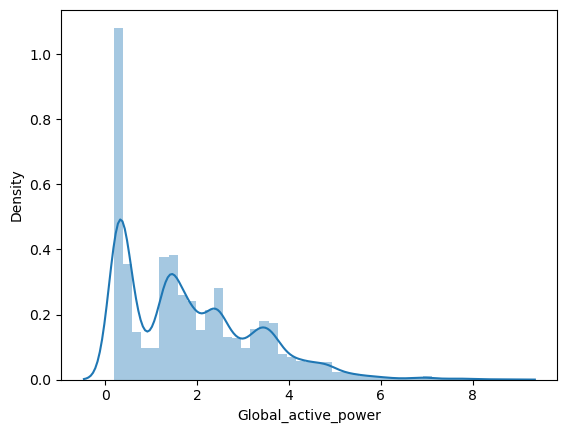

In [25]:


# check Kurtosis and skewness
sns.distplot(df_reduced.Global_active_power)
print('Kurtosis of normal distribution: {}'.format(stats.kurtosis(df_reduced.Global_active_power)))
print('Skewness of normal distribution: {}'.format(stats.skew(df_reduced.Global_active_power)))


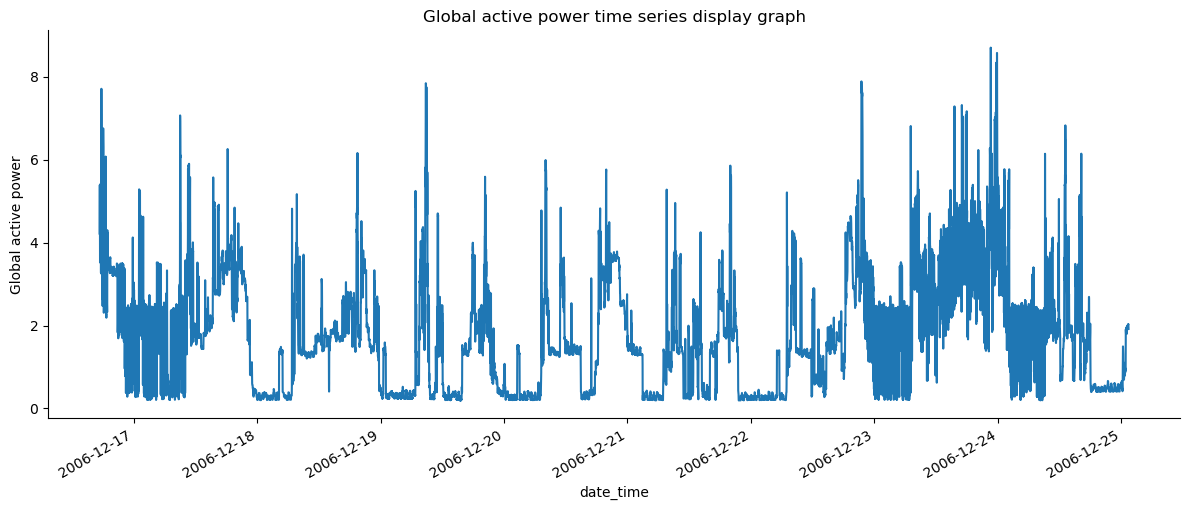

In [26]:
# Display a plot for the time-series data points
df1=df_reduced.loc[:,['date_time' ,'Global_active_power']]
df1.set_index('date_time',inplace=True)
df1.plot(figsize=(12,5))
plt.ylabel('Global active power')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Global active power time series display graph')
sns.despine(top=True)
plt.show()


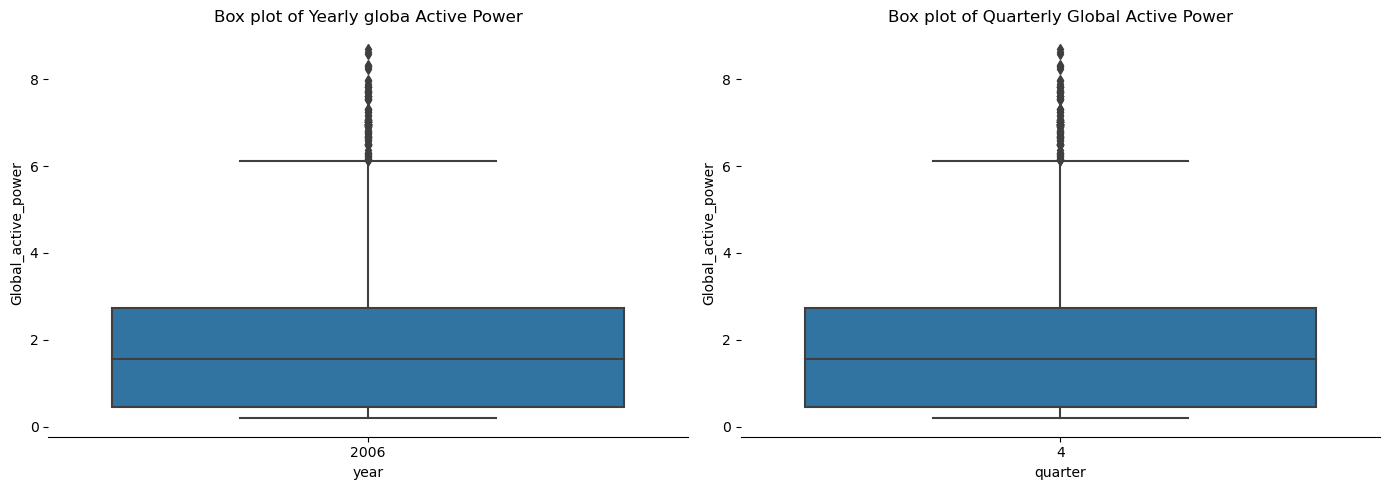

In [27]:
# Box plot of yearly vs quartly global active power
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.3) #adjusting the space between plots
sns.boxplot(x='year', y='Global_active_power',data=df_reduced)
plt.xlabel('year')
plt.title('Box plot of Yearly globa Active Power')
sns.despine(left=True)
plt.tight_layout()

#define the second plot-graph
plt.subplot(1,2,2)
sns.boxplot(x='quarter',y='Global_active_power',data=df_reduced)
plt.xlabel('quarter')
plt.title('Box plot of Quarterly Global Active Power')
sns.despine(left=True)
plt.tight_layout()


((array([-3.85540022, -3.63271486, -3.51057167, ...,  3.51057167,
          3.63271486,  3.85540022]),
  array([0.194, 0.194, 0.194, ..., 8.57 , 8.632, 8.698])),
 (1.364929300657445, 1.8489381563593927, 0.9565586081899162))

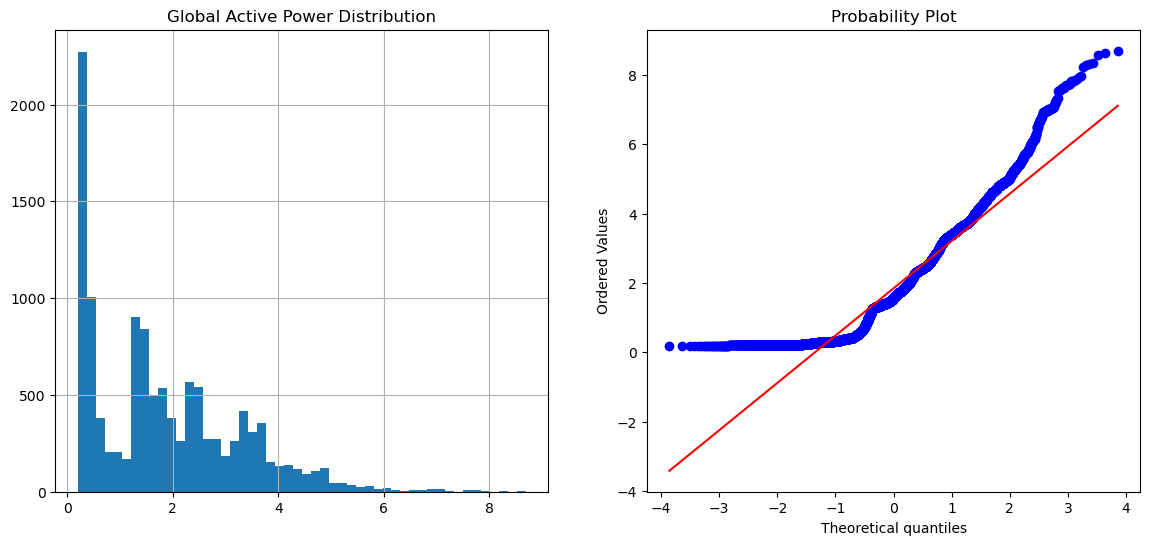

In [30]:
# Check the distribution of the data points
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df_reduced['Global_active_power'].hist(bins=50)
plt.title('Global Active Power Distribution')
plt.subplot(1,2,2)
stats.probplot(df_reduced['Global_active_power'],plot=plt)


In [31]:
df_reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,11998.0,1.848938,1.426543,0.194,0.452,1.564,2.7215,8.698
year,11998.0,2006.000000,0.000000,2006.000,2006.000,2006.000,2006.0000,2006.000
quarter,11998.0,4.000000,0.000000,4.000,4.000,4.000,4.0000,4.000
month,11998.0,12.000000,0.000000,12.000,12.000,12.000,12.0000,12.000
day,11998.0,20.382897,2.416135,16.000,18.000,20.000,22.0000,25.000
weekday,11998.0,0.606934,0.488452,0.000,0.000,1.000,1.0000,1.000


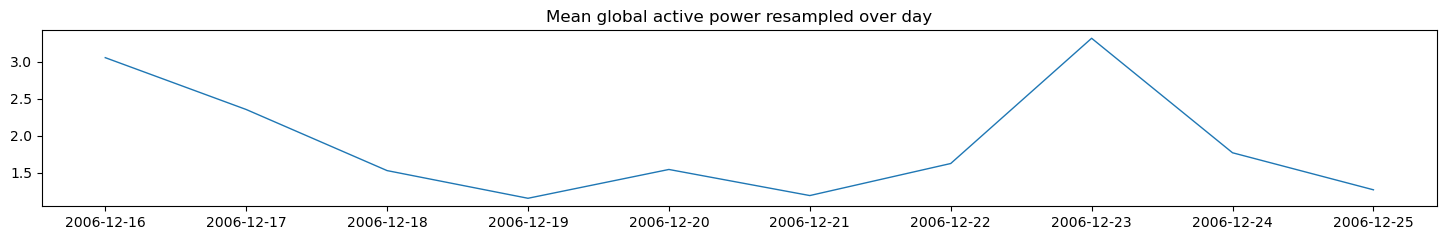

In [50]:
# Plot average global active power resampled over day,week,month quarter and year
#Here I used only daily resampling as our dataset is reduced

fig=plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=0.5)
ax1=fig.add_subplot(5,1,1)
ax1.plot(df1['Global_active_power'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean global active power resampled over day')
ax1.tick_params(axis='both',which='major')

# ax2=fig.add_subplot(5,1,2,sharex=ax1)
# ax2.plot(df1['Global_active_power'].resample('W').mean(),linewidth=1)
# ax2.set_title('Mean global active power resampled over week')
# ax2.tick_params(axis='both',width='major')

# ax3=fig.add_subplot(5,1,3,sharex=ax1)
# ax3.plot(df1['Global_active_power'].resample('M').mean(),linewidth=1)
# ax3.set_title("Mean Global Active Power resampled over month")
# ax3.tick_params(axis='both',which='major')

# ax4=fig.add_subplot(5,1,4,sharex=ax1)
# ax4.plot(df1['Global_active_power'].resample('Q').mean(),linewidth=1)
# ax4.set_title('Mean global active power resampled over quarter')
# ax4.tick_params(axis='both',which='major')

# ax5=fig.add_subplot(5,1,5,sharex=ax1)
# ax5.plot(df1['Global_active_power'].resample('A').mean(),linewidth=1)
# ax5.set_title('Mean global active power resampled over a year')
# ax5.tick_params(axis='both',which='major')

array([[<AxesSubplot:xlabel='day'>, <AxesSubplot:xlabel='day'>,
        <AxesSubplot:xlabel='day'>, <AxesSubplot:xlabel='day'>,
        <AxesSubplot:xlabel='day'>],
       [<AxesSubplot:xlabel='day'>, <AxesSubplot:xlabel='day'>,
        <AxesSubplot:xlabel='day'>, <AxesSubplot:xlabel='day'>,
        <AxesSubplot:xlabel='day'>],
       [<AxesSubplot:xlabel='day'>, <AxesSubplot:xlabel='day'>,
        <AxesSubplot:xlabel='day'>, <AxesSubplot:xlabel='day'>,
        <AxesSubplot:xlabel='day'>]], dtype=object)

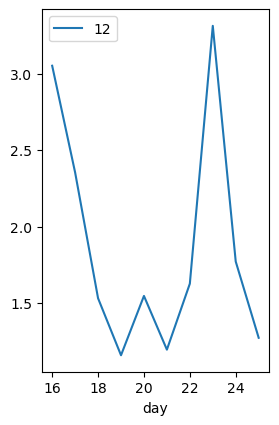

In [59]:
#We remove 2006 because other years have similar pattern.
pd.pivot_table(df_reduced,values='Global_active_power',columns='month',index='day').plot(subplots=True,figsize=(17,16),layout=(3,5),sharey=True)


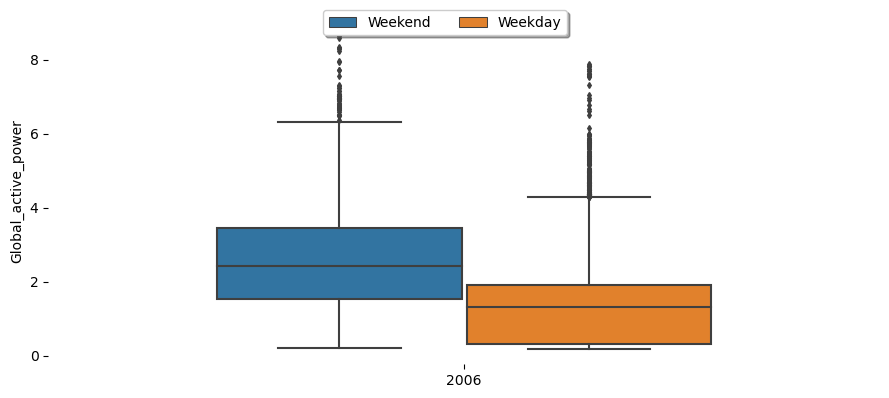

In [61]:
#Checking electricity consumption on weekdays and weekends for the dataset, which is highly important
# Check power consumption during weekdays and weekends
dic={0:'Weekend',1:'Weekday'}
df_reduced['Day']=df_reduced.weekday.map(dic)
a=plt.figure(figsize=(9,4))
plt1=sns.boxplot('year','Global_active_power',hue='Day',width=0.6,fliersize=3,data=df_reduced)
a.legend(loc='upper center',bbox_to_anchor=(0.5,1.0),shadow=True,ncol=2)
sns.despine(left=True,bottom=True)
plt.xlabel('')
plt.tight_layout()
plt.legend().set_visible(False)


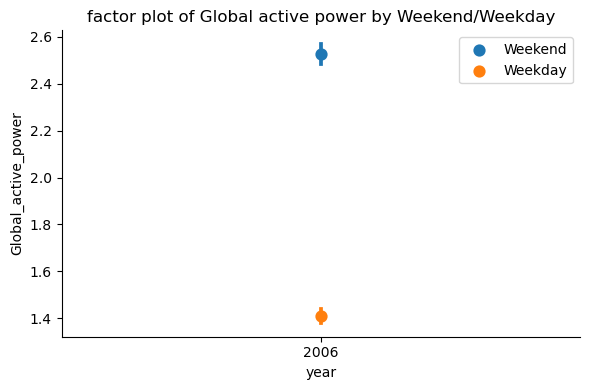

In [64]:
# Factor plot of global active power by weekday vs weekend
# since our reduced dataset has only reduced data points so it won't plot the upcoming years showing how much consumption vary between weekend and weekday
plt1=sns.factorplot('year','Global_active_power',hue='Day',data=df_reduced, size=4,aspect=1.5,legend=False)
plt.title('factor plot of Global active power by Weekend/Weekday')
plt.tight_layout()
sns.despine(left=False,bottom=False)
plt.legend(loc='upper right')


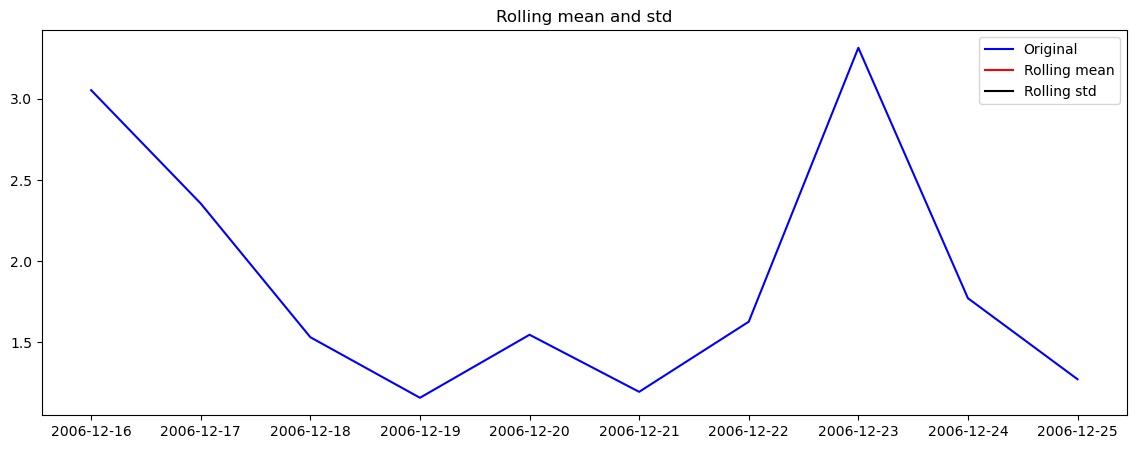

<Results of Dickey Fuller Test>
Test stastic                  -4.223960
p-value                        0.000600
#Lags Used                     3.000000
Number of observations used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


In [71]:
# Checking If dataset is stationary or not
df_reduced.set_index('date_time',inplace=True)
df_resampled=df_reduced['Global_active_power'].resample('D').mean()

#define user-defined function for stationarity test
def test_stationarity(timeseries):
  rolmean=timeseries.rolling(window=30).mean()
  rolstd=timeseries.rolling(window=30).std()

  plt.figure(figsize=(14,5))
  sns.despine(left=True)
  orig=plt.plot(timeseries,color='blue',label='Original')
  mean=plt.plot(rolmean,color='red',label='Rolling mean')
  std=plt.plot(rolstd, color='black',label='Rolling std')

  plt.legend(loc='best')
  plt.title('Rolling mean and std')
  plt.show()

  print('<Results of Dickey Fuller Test>')
  dftest=adfuller(timeseries,autolag='AIC')
  dfoutput=pd.Series(dftest[0:4],
                     index=['Test stastic','p-value','#Lags Used','Number of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]=value
  print(dfoutput)

test_stationarity(df_resampled)


# The Dickey-Fuller test 

1. It is a statistical test used to determine if a time series is stationary or not. Here are the steps to check for stationarity using the Dickey-Fuller test:

2. The Dickey-Fuller test outputs a test statistic and a p-value. If the test statistic is less than the critical value and the p-value is less than the significance level (usually 0.05), we can reject the null hypothesis that the time series is non-stationary and conclude that the time series is stationary. Based on the values of the reduced dataset, it is observed that our data is stantionary but further analysis to be done on the entire dataset.

